In [1]:
import itertools

import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from scipy import signal

import cv2
%matplotlib inline

from keras.models import Sequential #类似搭积木，用到一个添加一个
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist
import keras.backend as K

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

# config = tf.ConfigProto()
# set_session(tf.Session(config=config))
# config = tf.ConfigProto()
# config.gpu_options.allow_growth=True
# set_session(tf.Session(config=config))
set_session(tf.Session())

Using TensorFlow backend.


logitstic by keras

In [20]:
import keras
keras.__version__

'2.2.2'

Synetic data

In [7]:
X, t = make_circles(n_samples=5000, shuffle=False, factor=0.3, noise=0.1)
"""
make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)

Make a large circle containing a smaller circle in 2d.

Returns
-------
X : array of shape [n_samples, 2]
    The generated samples.

y : array of shape [n_samples]
    The integer labels (0 or 1) for class membership of each sample.
"""
x_red = X[t==0]
x_blue = X[t==1]
print('X shape: ', X.shape)
print('x_red shape: {}'.format(x_red.shape))
print('x_blue shape: ', x_blue.shape)

X shape:  (5000, 2)
x_red shape: (2500, 2)
x_blue shape:  (2500, 2)


Text(0.5,1,'red vs blue classes in the input space')

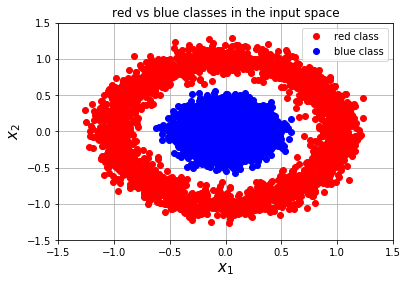

In [22]:
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='red class')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='blue class')
plt.grid()
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-1.5,1.5,-1.5,1.5]) # [xmin xmax ymin ymax]
plt.title('red vs blue classes in the input space')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=1/3, random_state=0)

In [24]:
X_test.shape

(1667, 2)

simple logitstic regression

In [25]:
model = Sequential()
model.add(Dense(1, input_dim=2, kernel_initializer='glorot_normal', activation='sigmoid'))
# Dense: units=1: Positive integer, dimensionality of the output space
sgd = SGD(lr = 0.001, decay=1e-6, momentum=0.9, nesterov=True )
# decay: float >= 0. Learning rate decay over each update 衰减, 
# nesterov: boolean. Whether to apply Nesterov momentum. 往前看一步

In [26]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd) 

In [27]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), verbose = 1, batch_size = 64, epochs = 10)

Train on 3333 samples, validate on 1667 samples
Epoch 1/10
3333/3333 [==============================] - 0s 131us/step - loss: 0.7524 - acc: 0.5047 - val_loss: 0.7550 - val_acc: 0.5027
Epoch 2/10
3333/3333 [==============================] - 0s 39us/step - loss: 0.7489 - acc: 0.5020 - val_loss: 0.7514 - val_acc: 0.5033
Epoch 3/10
3333/3333 [==============================] - 0s 42us/step - loss: 0.7455 - acc: 0.5008 - val_loss: 0.7481 - val_acc: 0.5039
Epoch 4/10
3333/3333 [==============================] - 0s 45us/step - loss: 0.7422 - acc: 0.4998 - val_loss: 0.7447 - val_acc: 0.5021
Epoch 5/10
3333/3333 [==============================] - 0s 43us/step - loss: 0.7391 - acc: 0.4989 - val_loss: 0.7415 - val_acc: 0.5003
Epoch 6/10
3333/3333 [==============================] - 0s 43us/step - loss: 0.7361 - acc: 0.4989 - val_loss: 0.7386 - val_acc: 0.5003
Epoch 7/10
3333/3333 [==============================] - 0s 43us/step - loss: 0.7332 - acc: 0.4971 - val_loss: 0.7356 - val_acc: 0.4991
Epoch 

In [13]:
def nn_predict(model, X):
    # logistic regression returns probability, need to tranform to label0, 1
    return (model.predict(X)>0.5).astype(int)

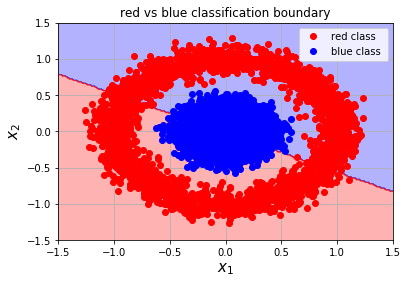

In [29]:
#Plot the resulting decision boundary
#Generate a grid over the input space to plot the color of the
#classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-2, 2, num = nb_of_xs)
xs2 = np.linspace(-2, 2, num = nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
#Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        pred = nn_predict(model, np.array([[xx[i,j], yy[i,j]]]))
        classification_plane[i, j] = pred[0, 0]
#Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha = 0.30),
        colorConverter.to_rgba('r', alpha = 0.30)])

#Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label = 'red class')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label = 'blue class ')
plt.grid()
plt.legend(loc = 1)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classification boundary')
plt.show()

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
y_test_pred = nn_predict(model, X_test)
#Show confusion table
conf_matrix = confusion_matrix(y_test, y_test_pred, labels = None)

Confusion matrix, without normalization
[[404 402]
 [433 428]]


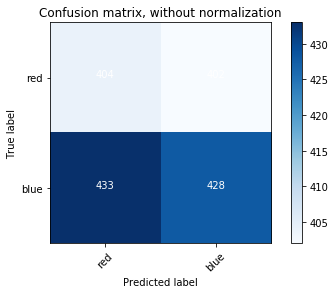

In [32]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['red', 'blue'],
                      title='Confusion matrix, without normalization')

# Neural Network with Nonlinear Activation

In this part, we will use a user-defined activation function, radial basis funciton(RBF). The RBF is a transfer function that is not usually used in neural networks, except for radial basis function networks. One of the most common transfer functions in neural networks is the sigmoid function. The RBF will allow to separate the blue samples from the red samples in this simple example by only activating for a certain region around the origin. The RBF is plotted in the figure below and is defined in this example as:

$$\text{RBF} = \phi(z) = e^{-z^2} $$

The derivative of this RBF function is:

$$\frac{d \phi(z)}{dz} = -2 z e^{-z^2} = -2 z \phi(z)$$

In [33]:
def rbf_np(z):
    return np.exp(-z**2)

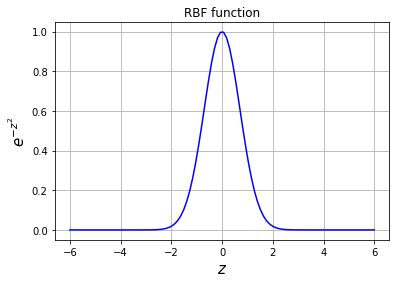

In [39]:
z = np.linspace(-6,6,100)
plt.plot(z, rbf_np(z), 'b-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$e^{-z^2}$', fontsize=15)
plt.title('RBF function')
plt.grid()

In [2]:
def rbf(x):
    return K.exp(-1.0 * x ** 2)

In [20]:
model = Sequential()
model.add(Dense(3, input_dim=2, kernel_initializer='glorot_normal')) # 输入2个，输出到3个隐藏层
model.add(Activation(rbf))
# model.add(BatchNormalization())
model.add(Dense(1, input_dim=3, kernel_initializer='glorot_normal')) # 此处input_dim可以不指定， keras可以自动检测
model.add(Activation('sigmoid'))

In [21]:
sgd = SGD(lr = 0.001, decay=1e-6, momentum=0.9, nesterov=True )

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [22]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), batch_size=1, epochs=10, verbose=1)

Train on 3333 samples, validate on 1667 samples
Epoch 1/10
3333/3333 [==============================] - 10s 3ms/step - loss: 0.5705 - acc: 0.8038 - val_loss: 0.3709 - val_acc: 0.9670
Epoch 2/10
3333/3333 [==============================] - 9s 3ms/step - loss: 0.2932 - acc: 0.9868 - val_loss: 0.2332 - val_acc: 0.9958
Epoch 3/10
3333/3333 [==============================] - 9s 3ms/step - loss: 0.2063 - acc: 0.9982 - val_loss: 0.1799 - val_acc: 0.9970
Epoch 4/10
3333/3333 [==============================] - 9s 3ms/step - loss: 0.1641 - acc: 0.9985 - val_loss: 0.1463 - val_acc: 0.9982
Epoch 5/10
3333/3333 [==============================] - 9s 3ms/step - loss: 0.1384 - acc: 0.9979 - val_loss: 0.1256 - val_acc: 0.9982
Epoch 6/10
3333/3333 [==============================] - 9s 3ms/step - loss: 0.1201 - acc: 0.9985 - val_loss: 0.1097 - val_acc: 0.9988
Epoch 7/10
3333/3333 [==============================] - 9s 3ms/step - loss: 0.1066 - acc: 0.9991 - val_loss: 0.0995 - val_acc: 0.9982
Epoch 8/10
33

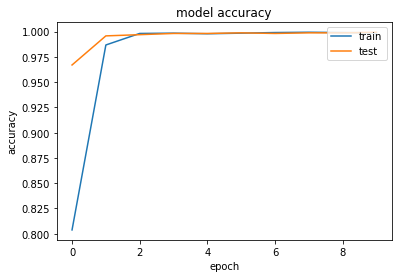

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

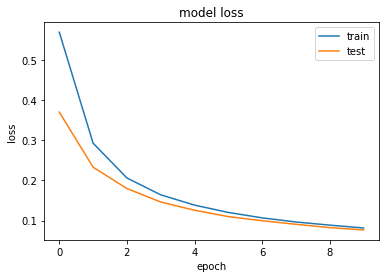

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

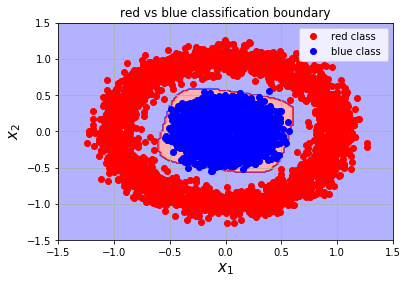

In [25]:
#Plot the resulting decision boundary
#Generate a grid over the input space to plot the color of the
#classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-2, 2, num = nb_of_xs)
xs2 = np.linspace(-2, 2, num = nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
#Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        pred = nn_predict(model, np.array([[xx[i,j], yy[i,j]]]))
        classification_plane[i, j] = pred[0, 0]
#Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha = 0.30),
        colorConverter.to_rgba('r', alpha = 0.30)])

#Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap = cmap)
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label = 'red class')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label = 'blue class ')
plt.grid()
plt.legend(loc = 1)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classification boundary')
plt.show()